In [1]:
## Imports ##

In [55]:
#basic data and image manipuation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

#CNN model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2D, Flatten, MaxPool2D, Dropout

#model management
import pickle


In [3]:
df_train = pd.read_csv("../data/mnist_train.csv")

In [4]:
type(df_train)

pandas.core.frame.DataFrame

In [5]:
df_test = pd.read_csv("../data/mnist_test.csv")

In [6]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
## basic preprocessing ##

In [8]:
label = df_train['label']
df_train = df_train.drop('label', axis = 1)

In [9]:
type(df_train)

pandas.core.frame.DataFrame

In [10]:
test_label = df_test['label']
df_test = df_test.drop('label', axis = 1)

In [11]:
df_train = df_train.values.reshape(-1,28,28,1)
df_test = df_test.values.reshape(-1,28,28,1)

In [12]:
df_train = df_train/255.0  
df_test = df_test/255.0

In [13]:
df_train.shape

(60000, 28, 28, 1)

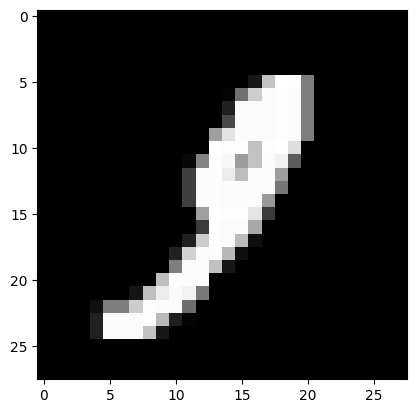

In [14]:
plt.imshow(df_train[3510], cmap="gray")

In [15]:
label[3510]

9

In [16]:
## test train split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_train, label, test_size= 0.3)

In [18]:
type(y_train)

pandas.core.series.Series

In [19]:
type(X_train)

numpy.ndarray

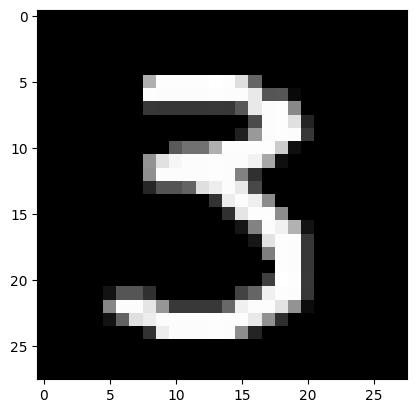

In [20]:
plt.imshow(X_train[3510], cmap = "gray")

In [21]:
datagen = ImageDataGenerator(
    rotation_range=10,  
    zoom_range = 0.10,  
    width_shift_range=0.2, 
    height_shift_range=0.2
)

datagen.fit(X_train)


In [22]:
#plt.imshow(datagenerator[0][2], cmap = "gray")

NameError: name 'datagenerator' is not defined

In [ ]:
#X_train = datagenerator[0]

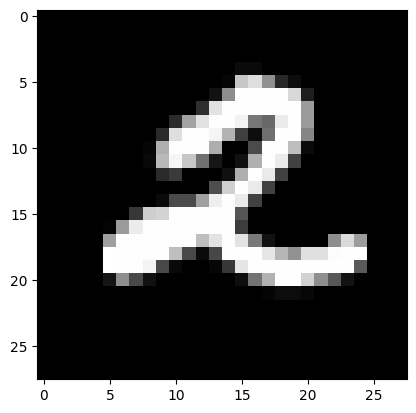

In [23]:
plt.imshow(X_train[200], cmap = "gray")

3


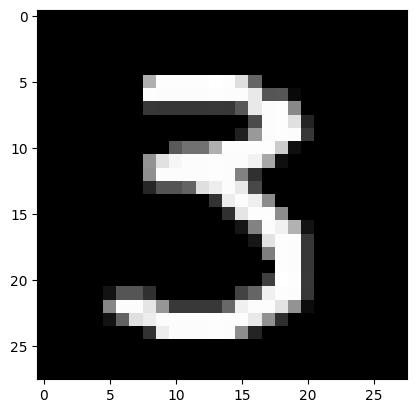

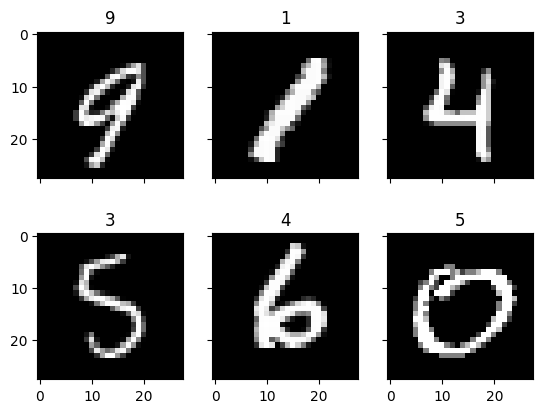

In [24]:
print(y_train.iloc[3510])
plt.imshow(X_train[3510], cmap = "gray")

# using the variable axs for multiple Axes
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

# marker symbol
for i in range(3):
    for j in range(2):
        axs[j, i].imshow(X_train[3600+i+(10*j)], cmap = "gray")
        axs[j,i].set_title(y_train.iloc[3500+i+(10*j)])
    




In [25]:
X_train.shape

(42000, 28, 28, 1)

In [56]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(28, 28, 1), padding='same', activation="relu")) # Flattening of a 28*28 image with 1 color
model.add(Conv2D(32, kernel_size = (4, 4), padding = 'SAME', activation = 'relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))


model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        8224      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 dense_4 (Dense)             (None, 14, 14, 100)       3300      
                                                                 
 dense_5 (Dense)             (None, 14, 14, 50)        5050      
                                                      

In [57]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
        validation_data=datagen.flow(X_train, y_train, batch_size=8),
          epochs=5,  # Use early stopping in practice
          batch_size=32, 
          verbose=1)

Epoch 1/5
1313/1313 [==============================] - 42s 31ms/step - loss: 0.8789 - accuracy: 0.7020 - val_loss: 0.3610 - val_accuracy: 0.8921
Epoch 2/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.2997 - accuracy: 0.9104 - val_loss: 0.2144 - val_accuracy: 0.9363
Epoch 3/5
1313/1313 [==============================] - 43s 33ms/step - loss: 0.2109 - accuracy: 0.9378 - val_loss: 0.1824 - val_accuracy: 0.9460
Epoch 4/5
1313/1313 [==============================] - 44s 34ms/step - loss: 0.1771 - accuracy: 0.9468 - val_loss: 0.1397 - val_accuracy: 0.9586
Epoch 5/5
1313/1313 [==============================] - 44s 34ms/step - loss: 0.1514 - accuracy: 0.9544 - val_loss: 0.1495 - val_accuracy: 0.9562


In [58]:
history.history

{'loss': [0.8788537979125977,
  0.29968491196632385,
  0.21087302267551422,
  0.17714060842990875,
  0.15135954320430756],
 'accuracy': [0.7020238041877747,
  0.9104285836219788,
  0.9377619028091431,
  0.9468095302581787,
  0.9543809294700623],
 'val_loss': [0.36103659868240356,
  0.21436892449855804,
  0.18239963054656982,
  0.13971692323684692,
  0.14952901005744934],
 'val_accuracy': [0.8921428322792053,
  0.9363095164299011,
  0.9459523558616638,
  0.958642840385437,
  0.9562380909919739]}

In [59]:
model.predict(df_test)

313/313 [==============================] - 2s 7ms/step


array([[6.14392356e-11, 5.43248859e-08, 3.90588457e-06, ...,
        9.99993801e-01, 4.39565406e-09, 2.07929384e-06],
       [3.42110206e-06, 3.43577744e-09, 9.99994874e-01, ...,
        1.32286875e-08, 6.43121778e-09, 2.57580970e-11],
       [1.88159847e-05, 9.72735584e-01, 1.01990372e-05, ...,
        9.34309792e-03, 3.08672934e-05, 9.18222067e-04],
       ...,
       [5.38253470e-11, 2.57836774e-09, 1.15743298e-07, ...,
        3.02492458e-06, 1.87218791e-06, 1.31953726e-04],
       [2.00630367e-07, 1.48890442e-10, 1.46970706e-06, ...,
        2.91674915e-08, 2.47953143e-02, 2.49101482e-02],
       [3.04472487e-04, 1.27804989e-11, 2.96884216e-03, ...,
        3.80670023e-10, 3.34003046e-02, 9.48126035e-05]], dtype=float32)

In [60]:
predictions = model.predict(df_test)

313/313 [==============================] - 2s 7ms/step


In [61]:
predictions[0]

array([6.1439236e-11, 5.4324886e-08, 3.9058846e-06, 2.0954419e-08,
       5.0136861e-10, 1.5997166e-07, 4.7529434e-13, 9.9999380e-01,
       4.3956541e-09, 2.0792938e-06], dtype=float32)

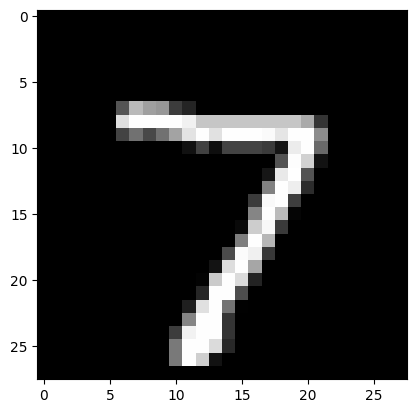

In [62]:
plt.imshow(df_test[0], cmap = "gray")

In [63]:
prediction = model.predict(np.expand_dims(df_test[21], axis=0))
prediction

1/1 [==============================] - 0s 14ms/step


array([[5.9236994e-05, 3.4615064e-09, 2.6857842e-06, 6.4239821e-08,
        3.3739027e-05, 1.0639430e-02, 9.7786558e-01, 3.8831841e-10,
        1.0893367e-02, 5.0586805e-04]], dtype=float32)

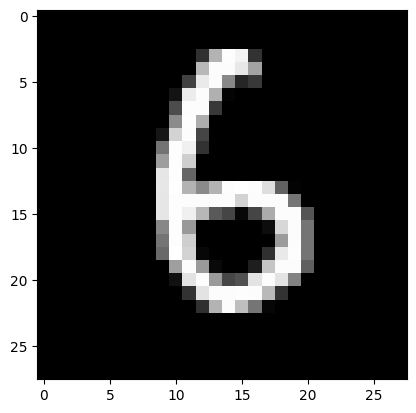

In [64]:
plt.imshow(df_test[21], cmap = "gray")

In [65]:
def predict_arr_to_int(array):
    digit = "unknown"
    for i in range(10):
        if array[0][i] > 0.9:
            digit = i
    return str(digit)

In [66]:
predict_arr_to_int(prediction)

'6'

In [67]:
prediction[0][6]

0.9778656

In [68]:
filename = '../models/digit_model_v2.sav'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dropout
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name         